## **Linear Regression**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv("Height_Weight_Dataset.csv")

In [75]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

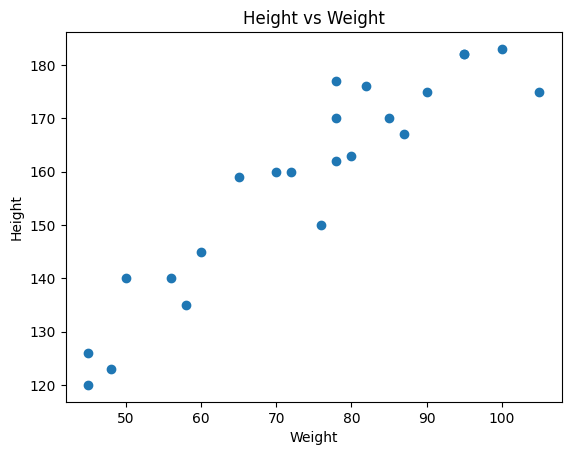

In [76]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")

In [77]:
## finding correlation
df.corr() # uses pearson correlation

,Weight,Height
Weight,1.000000,0.932177
Height,0.932177,1.000000


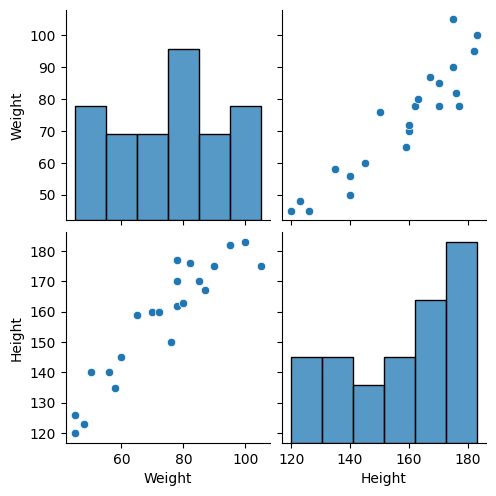

In [78]:
# using seaborn for visualization
sns.pairplot(df)

In [79]:
# divide features into dependent and independent features
# tip: make sure ur independent features are in 2D array or dataframe format

X = df[['Weight']] # independent => make it 2d
y = df['Height'] # dependent => only 1d is enough

In [80]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) # random state for reproducibility

In [81]:
X_train.shape

(17, 1)

In [82]:
y_train.shape

(17,)

In [83]:
# standardization: make mean=0 and std=1 and make all in same scale
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit and transform to same scale

In [85]:
X_test = scaler.transform(X_test) # only transform

In [86]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

In [87]:
regression = LinearRegression(n_jobs=-1) # n_jobs=-1 means use all cores

In [88]:
# fit this regression model into training data
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [89]:
print("Coefficient or slope:", regression.coef_)  # slope: beta1
print("Intercept:", regression.intercept_)  # intercept: beta0

Coefficient or slope: [17.59188237]
Intercept: 156.2941176470588


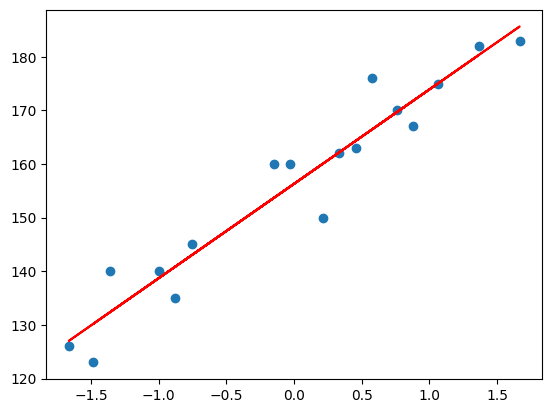

In [90]:
# plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

#### **Prediction of test data**
1. predicted height output = intercept + coefficient*weight
2. y_pred = 156.29 + 17.59*(X_test)

In [91]:
# prediction for the test data
y_pred = regression.predict(X_test)

In [92]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [93]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 116.85987826845496
Mean Absolute Error: 9.661506747261312
Root Mean Squared Error: 10.81017475661032


#### **Rsquare**
Formula
**R^2 = 1 - SSR/SST**

- R^2 = coefficient of determination
- SSR = sum of squares of residuals
- SST = total sum of sqaures

In [94]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R2 Score:",score)

R2 Score: 0.7314423480584502


#### Adjusted Rsquared
Formula
**Adjusted Rsqaured = 1 - [(1-R2)*(n-1)/(n-k-1)]**
where
- R2: R sqaured value 
- n: no. of observations 
- k: no. of predictor variables

In [95]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # adjusted R2

0.6643029350730627

In [96]:
## Do the same using OLS method
import statsmodels.api as sm

In [97]:
model=sm.OLS(y_train,X_train).fit()

In [98]:
prediction = model.predict(X_test)
print(prediction)

[  5.89278234   5.89278234 -29.27584417  24.00995357  -7.96152507
  34.66711311]


In [99]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2025
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                       0.659
Time:                        23:32:11   Log-Likelihood:                         -110.01
No. Observations:                  17   AIC:                                      222.0
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\MachineLearningAlgorithms\ml_algos\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [100]:
# prediction for new data
new_data = np.array([60]).reshape(-1,1) # 2d array
new_data = scaler.transform(new_data) # scale it
regression.predict(new_data) # predict the height

d:\MachineLearningAlgorithms\ml_algos\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([143.0040128])